In [1]:
import torch
import torch.nn as nn

import torch.nn.functional as F

import backtrader as bt # 导入 Backtrader
import pandahouse as ph
import datetime
import numpy as np
import pandas as pd
import math
from pylab import mpl,plt
conn = {
    'database':'stock_data',
    'host':'http://127.0.0.1:8123',
    'user':'default',
    'password' : '',
}


select trade_date as datetime,open,high,low,close,volume,adjfactor from stock_data.stock_daily where stock_code == 9 and trade_date > '2010-01-01' and trade_date < '2023-03-01'
returns     1.023389
strategy    1.434663
dtype: float64
returns     2.782609
strategy    4.198231
dtype: float64


/tmp/ipykernel_20535/1828683751.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: title={'center': 'EUR/USD | 42 & 252 days SMAs'}, xlabel='datetime'>

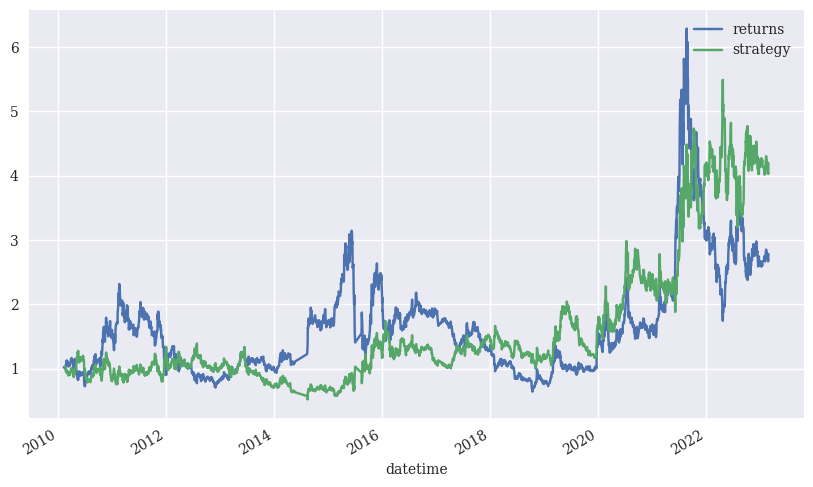

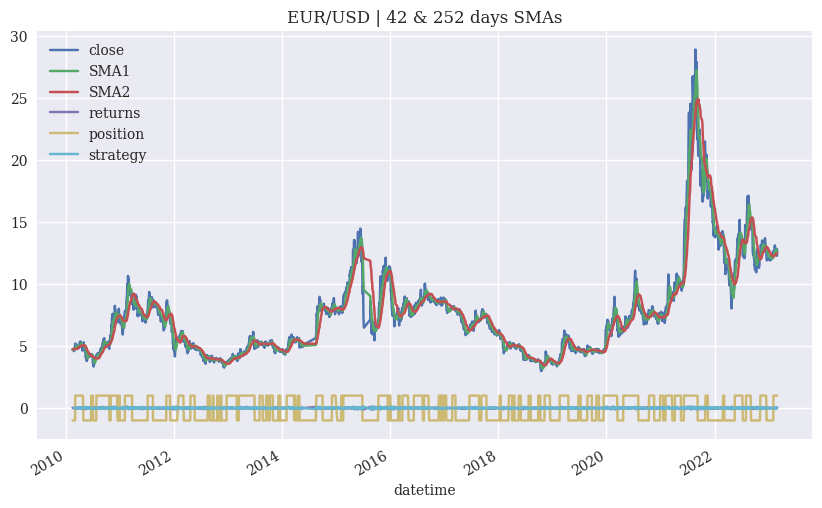

In [49]:
start_time = '2010-01-01'
end_time = '2023-03-01'
sql = f'select trade_date as datetime,open,high,low,close,volume,adjfactor from stock_data.stock_daily where stock_code == 9 and trade_date > \'{start_time}\' and trade_date < \'{end_time}\''
print(sql)
df =ph.read_clickhouse(sql,connection=conn)
df.drop(df[df['close'] == -1].index,inplace=True)
df.sort_values('datetime',inplace=True)
# print(df)
adj = df.iloc[-1]['close'] / df.iloc[-1]['adjfactor']
# print(df['close'])
# print(round(df['adjfactor'] * adj / 100,2))
df['close'] = round(df['adjfactor'] * adj / 100,2)
# print(df)

short = df['close'].rolling(10).mean()
long = df['close'].rolling(30).mean()


plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
data = pd.DataFrame()
# print(df['close'])
data['close'] = df['close']
data['SMA1'] = short
data['SMA2'] = long
data.index = df['datetime']
# print(data['close'],data['close'].shift(1))

data['returns'] = np.log(data['close'] / data['close'].shift(1))
# data['returns'].hist(bins=35, figsize=(10, 6))
data['position'] = np.where(data['SMA1'] > data['SMA2'],1, -1)
data.dropna(inplace=True)
# print(data['position'])
# data['position'].plot(ylim=[-1.1, 1.1],title='Market Positioning',figsize=(10, 6))
data['strategy'] = data['position'].shift(1) * data['returns']
print(data[['returns', 'strategy']].sum())
print(data[['returns', 'strategy']].sum().apply(np.exp))
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
data.plot(title='EUR/USD | 42 & 252 days SMAs', figsize=(10, 6))
# data['position'].plot(ylim=[-1.1, 1.1],
#  title='Market Positioning',
# figsize=(10, 6)); 


In [6]:
print()

Int64Index([  77,   78,   79,  107,  108,  109,  110,  111,  112,  113,
            ...
             612,  613,  614,  615,  616,  617,  618,  619,  620, 1492],
           dtype='int64', length=189)
